In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('TCS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [3]:
df.info

<bound method DataFrame.info of             Date Symbol Series  Prev Close     Open     High      Low  \
0     2004-08-25    TCS     EQ      850.00  1198.70  1198.70   979.00   
1     2004-08-26    TCS     EQ      987.95   992.00   997.00   975.30   
2     2004-08-27    TCS     EQ      979.00   982.40   982.40   958.55   
3     2004-08-30    TCS     EQ      962.65   969.90   990.00   965.00   
4     2004-08-31    TCS     EQ      986.75   986.50   990.00   976.00   
...          ...    ...    ...         ...      ...      ...      ...   
4134  2021-04-26    TCS     EQ     3109.50  3102.05  3153.00  3088.05   
4135  2021-04-27    TCS     EQ     3100.80  3106.00  3136.10  3103.00   
4136  2021-04-28    TCS     EQ     3132.00  3149.95  3151.00  3112.00   
4137  2021-04-29    TCS     EQ     3124.10  3145.60  3157.35  3105.50   
4138  2021-04-30    TCS     EQ     3115.25  3099.00  3132.05  3020.00   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      985.00   987.95

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


In [5]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [10]:
df = df.drop(['Series'], axis = 1)

In [11]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042
1,2004-08-26,TCS,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561
2,2004-08-27,TCS,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549
3,2004-08-30,TCS,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294
4,2004-08-31,TCS,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['month_name']=df['Date'].dt.month_name()
df['day']=df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['is_weekend'] = df['Date'].dt.weekday >= 5
df = df.drop(['Date','month_name'],axis=1)
df

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,day_of_week,quarter,is_weekend
0,TCS,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042,2004,8,25,2,3,False
1,TCS,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561,2004,8,26,3,3,False
2,TCS,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549,2004,8,27,4,3,False
3,TCS,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294,2004,8,30,0,3,False
4,TCS,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624,2004,8,31,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,TCS,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,1345353,0.5402,2021,4,26,0,2,False
4135,TCS,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,849767,0.5775,2021,4,27,1,2,False
4136,TCS,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,847762,0.5172,2021,4,28,2,2,False
4137,TCS,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,837567,0.5166,2021,4,29,3,2,False


<Axes: ylabel='Close'>

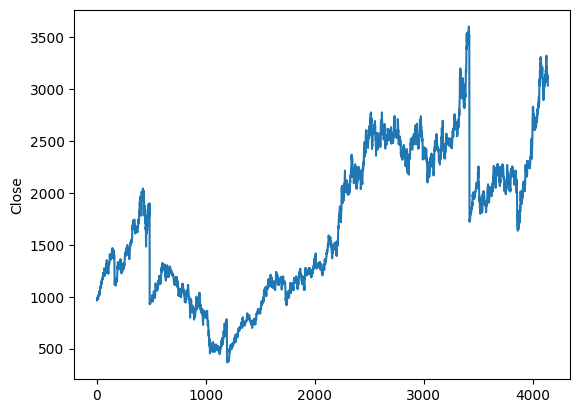

In [18]:
sns.lineplot(df.Close)

<Axes: ylabel='High'>

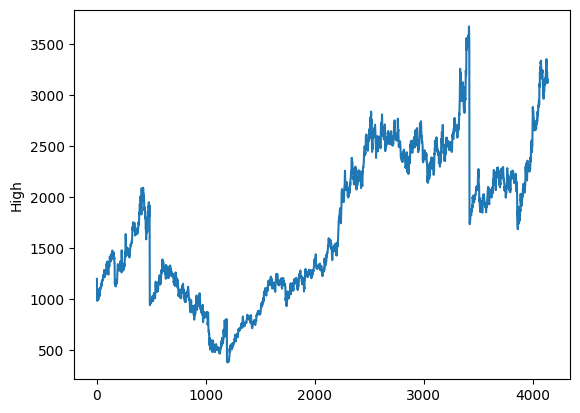

In [24]:
sns.lineplot(df.High)

<Axes: ylabel='Turnover'>

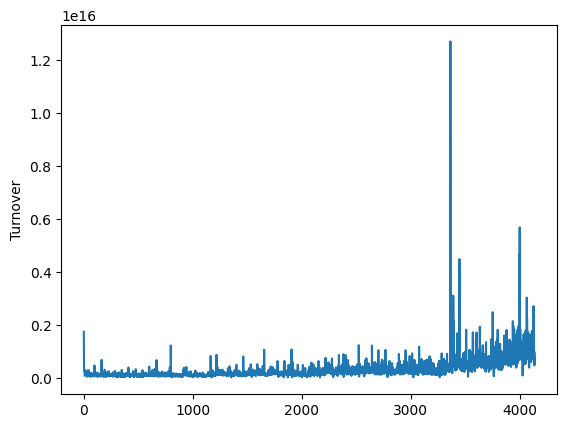

In [25]:
sns.lineplot(df.Turnover)

In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to the 'Symbol' column and store the result in 'symbol_encoded'
df['symbol_encoded'] = ordinal_encoder.fit_transform(df[['Symbol']])

# Apply Ordinal Encoding to the 'is_weekend' column and store the result in 'weekend_encoded'
df['weekend_encoded'] = ordinal_encoder.fit_transform(df[['is_weekend']])
df =df.drop(['Symbol', 'is_weekend'], axis=1)
# Display the updated DataFrame
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,day_of_week,quarter,symbol_encoded,weekend_encoded
0,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042,2004,8,25,2,3,0.0,0.0
1,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561,2004,8,26,3,3,0.0,0.0
2,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549,2004,8,27,4,3,0.0,0.0
3,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294,2004,8,30,0,3,0.0,0.0
4,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624,2004,8,31,1,3,0.0,0.0


In [28]:
X= df.drop(['Close'],axis=1)
Y= df['Close']
sd = StandardScaler()
df=sd.fit_transform(X)

In [29]:
df = pd.DataFrame(df, columns=X.columns)

<Axes: >

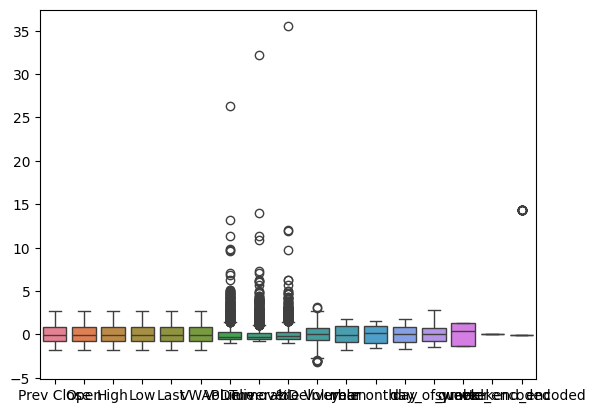

In [30]:
sns.boxplot(data=df)


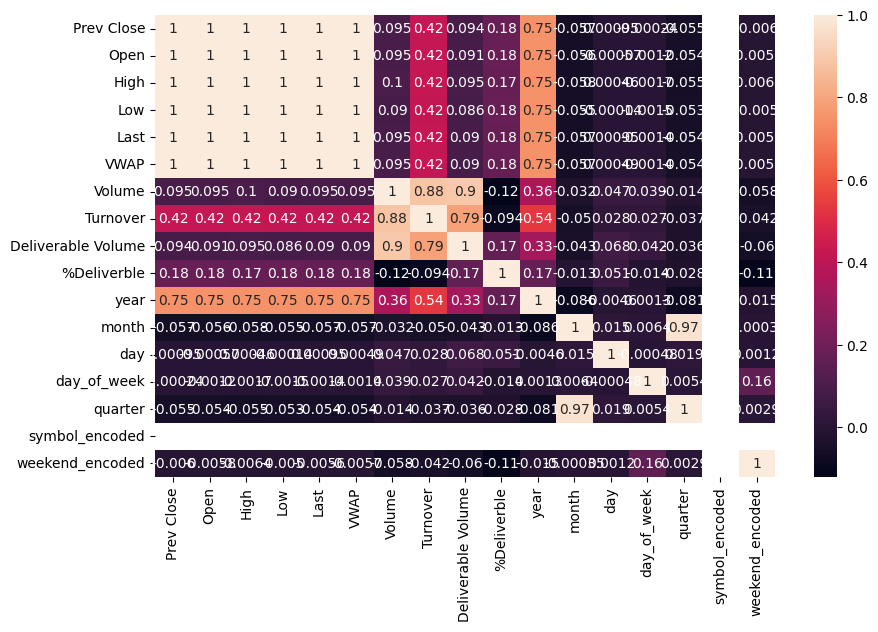

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
lr= LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 230.38690402100056
R-squared: 0.9995513734584982


In [36]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X, Y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

# Print the cross-validation scores for each fold
print("Cross-validation MSE scores for each fold:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean MSE: {cv_scores.mean()}")
print(f"Standard Deviation of MSE: {cv_scores.std()}")

Cross-validation MSE scores for each fold: [240.38508188 121.62362612 181.42724394 290.56955797 584.2128202 ]
Mean MSE: 283.64366602247503
Standard Deviation of MSE: 160.59874208720754


In [38]:
# Make predictions on the validation set (or new data)
Y_pred = lr.predict(X_test)

# Display the predictions
print("Predictions:", Y_test)

# You can also evaluate the performance of the model by calculating metrics like MSE, R-squared, etc.
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2)

Predictions: 3765    2269.65
1278     608.80
568     1149.85
149     1390.55
1268     629.85
         ...   
2103    1356.35
1749    1033.90
3991    2332.25
3871    1708.75
178     1149.10
Name: Close, Length: 828, dtype: float64
Mean Squared Error: 230.38690402100056
R-squared: 0.9995513734584982
